# **AYUSH VERMA**

## HAMOYE ID: 1477941c2441f000

### *PRACTICAL TIME SERIES ANALYSIS & FORECAST*



---

DATASET([HDSC-Time-series-analysis-and-forecast](https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast))

* FullDate: Date in format yyyy-mm-dd  hh:mm:ss

* ElecPrice: Prices of electricity charged in Kw per hour

* Gas Price: power generated was done via a gas power plant, gas price is the price of gas at time-T

* SysLoad: Total Load on system or Power consumed at time-T 
Tmax: maximum temperature at time-T
---


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from fbprophet import Prophet

In [ ]:
df = pd.read_csv('/content/Time_series_analysis_and_forecast_DATASET (1).csv')

In [ ]:
df.head(3)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


**All the values are in float except for the Date Column**

In [ ]:
df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

**There are no null values and therefore no cleaning is required**

In [ ]:
df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


**All the values are continuous and can be used for regression modelling if needed**

In [ ]:
df["FullDate"] = pd.to_datetime(df["FullDate"])

In [ ]:
df = df.set_index("FullDate")

In [ ]:
daily_df = df.resample('D').sum()

In [ ]:
daily_df.head(3)

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.38,88.56,2751.700
2010-09-02,369.6,38898.99,88.56,570.810
2010-09-03,439.2,41665.76,106.80,504.975


# Q11. 

**Resample the data from an hour sampling rate to a daily sampling rate (i.e sum over the hours for each day). Which of the following is a plot of ElecPrice over time?**

## Answer:

Text(0, 0.5, 'Electric Price')

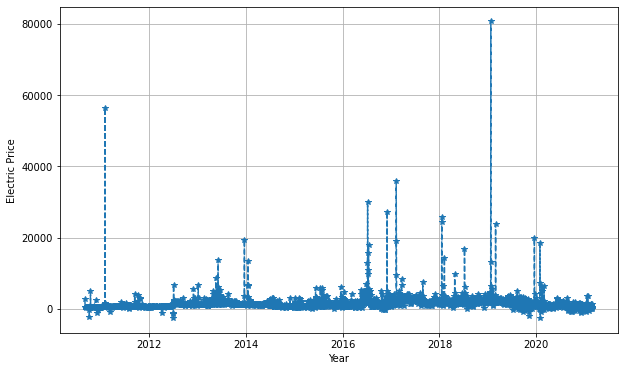

In [ ]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(daily_df.index, daily_df['ElecPrice'], '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'Electric Price' )

---

# Q14.
**Using the Augmented Dicky Fuller test (ADF), what is the P-value of the SysLoad and GasPrice of the resampled Data set, to 6 decimal places?**

In [ ]:
sys_result = adfuller(daily_df['SysLoad'])

In [ ]:
gas_result = adfuller(daily_df['GasPrice'])

##Answer:

In [88]:
print(f'SysLoad p-value: {round(sys_result[1],6)}')
print(f'GasPrice p-value: {round(gas_result[1],6)}')

SysLoad p-value: 0.004254
GasPrice p-value: 0.045027


---

#Q15.
**Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set, to 4 decimal places?**

In [ ]:
elec_result = adfuller(daily_df['ElecPrice'])

## Answer:

In [89]:
print('Critical Values:')
print(f'10% of GasPrice : {round(gas_result[4]["10%"],4)}')
print(f'5% of GasPrice : {round(elec_result[4]["5%"],4)}') 

Critical Values:
10% of GasPrice : -2.5672
5% of GasPrice : -2.8623


---

In [ ]:
train_data = daily_df.iloc[:2757,:]
test_data = daily_df.iloc[2757:,:] 

In [ ]:
train_data.shape , test_data.shape

((2757, 4), (1077, 4))

In [ ]:
train_data.reset_index(inplace = True)
train_data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [ ]:
df_train = train_data.iloc[:,[0,-1]]

In [ ]:
df_train = df_train.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
df_train.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [ ]:
test_data.reset_index(inplace = True)
test_data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2018-03-20,540.0,7696.91130,201.5880,1833.00
1,2018-03-21,571.2,4658.05865,203.2560,1730.49
2,2018-03-22,722.4,19161.78525,203.2560,2260.55
3,2018-03-23,811.2,18090.43435,198.6456,2138.76
4,2018-03-24,832.8,3763.53865,180.2160,1721.70


In [ ]:
test_df = test_data.iloc[:,[0,-1]]

In [ ]:
test_df = test_df.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
test_df.head()

,ds,y
0,2018-03-20,1833.00
1,2018-03-21,1730.49
2,2018-03-22,2260.55
3,2018-03-23,2138.76
4,2018-03-24,1721.70


In [ ]:
model = Prophet()
model.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast_values = model.predict(test_df) 
forecast_values.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2691.764386,162.205360,5056.459796,2691.764386,2691.764386,-155.426892,-155.426892,-155.426892,9.749221,9.749221,9.749221,-165.176114,-165.176114,-165.176114,0.0,0.0,0.0,2536.337494
1,2018-03-21,2692.580955,219.725511,4975.680653,2692.580955,2692.580955,-2.925496,-2.925496,-2.925496,159.308129,159.308129,159.308129,-162.233625,-162.233625,-162.233625,0.0,0.0,0.0,2689.655459
2,2018-03-22,2693.397524,416.420051,5155.880015,2693.397524,2693.397524,95.308217,95.308217,95.308217,257.036327,257.036327,257.036327,-161.728110,-161.728110,-161.728110,0.0,0.0,0.0,2788.705741
3,2018-03-23,2694.214093,270.227018,4970.926170,2694.214093,2694.214093,-113.236873,-113.236873,-113.236873,50.257478,50.257478,50.257478,-163.494350,-163.494350,-163.494350,0.0,0.0,0.0,2580.977221
4,2018-03-24,2695.030663,-86.593945,4957.068456,2695.030663,2695.030663,-438.662722,-438.662722,-438.662722,-271.372061,-271.372061,-271.372061,-167.290660,-167.290660,-167.290660,0.0,0.0,0.0,2256.367941


# Q14.
**Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?**

**Hint:**

**Define a function that calculates the Mape using the definition of MAPE from the course Module and pass your dataset into it.**

In [ ]:
def Metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100

## Answer:

In [ ]:
MAPE = Metric(test_df['y'],forecast_values['yhat'])
print(f'The Mean Average Percentage Error ( MAPE) is: {round(MAPE,2)}')

The Mean Average Percentage Error ( MAPE) is: 549.48


---

In [ ]:
from sklearn import metrics

# Q15.
**What is the RMSE in 2 decimal places?**

## Answer:

In [ ]:
RMSE = np.sqrt(metrics.mean_squared_error(test_df['y'],forecast_values['yhat']))
print(f'The Mean Average Percentage Error ( MAPE) is: {round(RMSE,4)}')

The Mean Average Percentage Error ( MAPE) is: 3218.1558


---

# Q16.
**If you plot the components from the forecasted model, what month of the yearly seasonality has the highest value?**

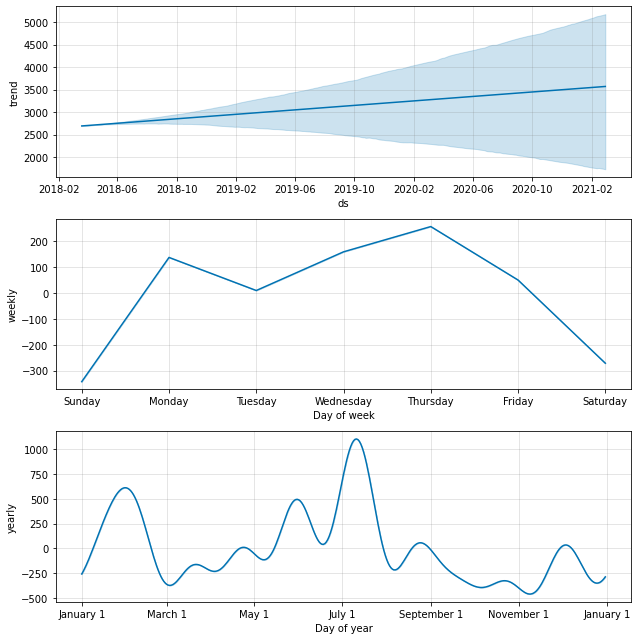

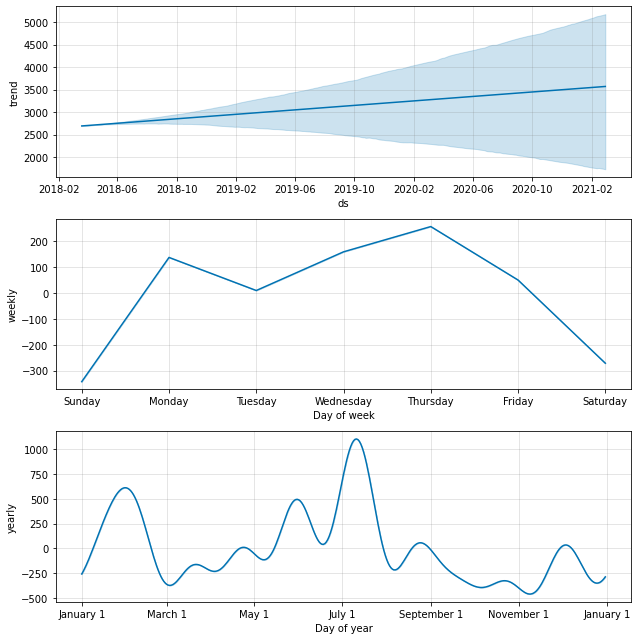

In [ ]:
model.plot_components(forecast_values)

## Answer: July

---

In [ ]:
daily_df.reset_index(inplace=True)

In [ ]:
daily_df.head(3)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.38,88.56,2751.700
1,2010-09-02,369.6,38898.99,88.56,570.810
2,2010-09-03,439.2,41665.76,106.80,504.975


Setting the regression and prediction features for training

In [ ]:
daily_df_new = daily_df.rename(columns = {'FullDate':'ds','Tmax':'add2',
                                           'SysLoad':'add1','GasPrice':'add3',
                                           'ElecPrice':'y'})

In [ ]:
daily_df_new.head(3)

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.38,88.56,2751.700
1,2010-09-02,369.6,38898.99,88.56,570.810
2,2010-09-03,439.2,41665.76,106.80,504.975


In [ ]:
train_data_new = daily_df_new.iloc[:2757,:]
test_data_new = daily_df_new.iloc[2757:,:]

In [ ]:
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')

In [ ]:
model = model.fit(train_data_new)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast_values_new = model.predict(test_data_new)

# Q17.
**Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?**

## Answer:

In [ ]:
MAPE = Metric(test_data_new['y'],forecast_values_new['yhat'])
print(f'The Mean Average Percentage Error ( MAPE) is:{round(MAPE,2)}')

The Mean Average Percentage Error ( MAPE) is:236.66


---

#Q18.
**What is the RMSE in 2 decimal places?**

## Answer:

In [ ]:
RMSE = np.sqrt(metrics.mean_squared_error(test_data_new['y'],forecast_values_new['yhat']))
print(f'The Mean Average Percentage Error ( MAPE) is: {round(RMSE,2)}')

The Mean Average Percentage Error ( MAPE) is: 2712.93


---

#Q19.
**If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the highest value?**

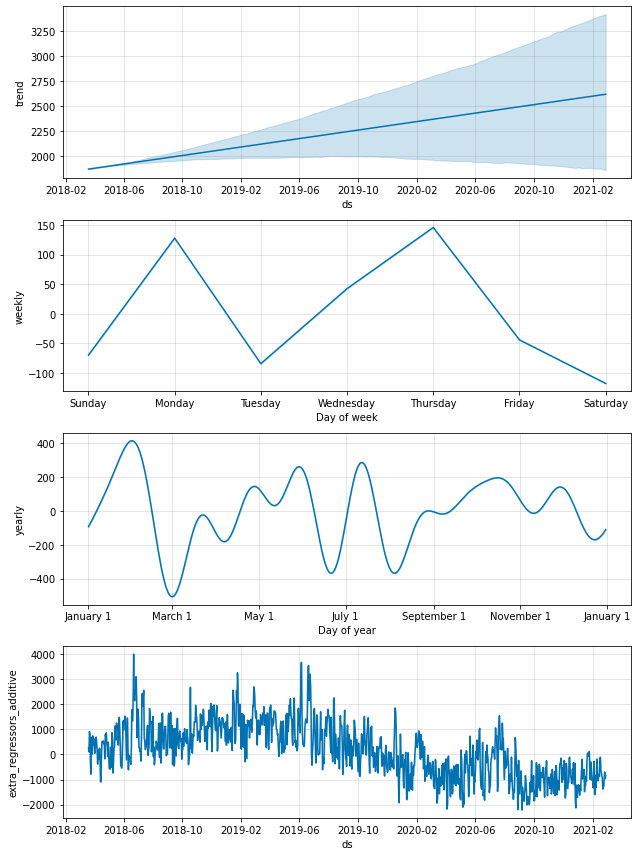

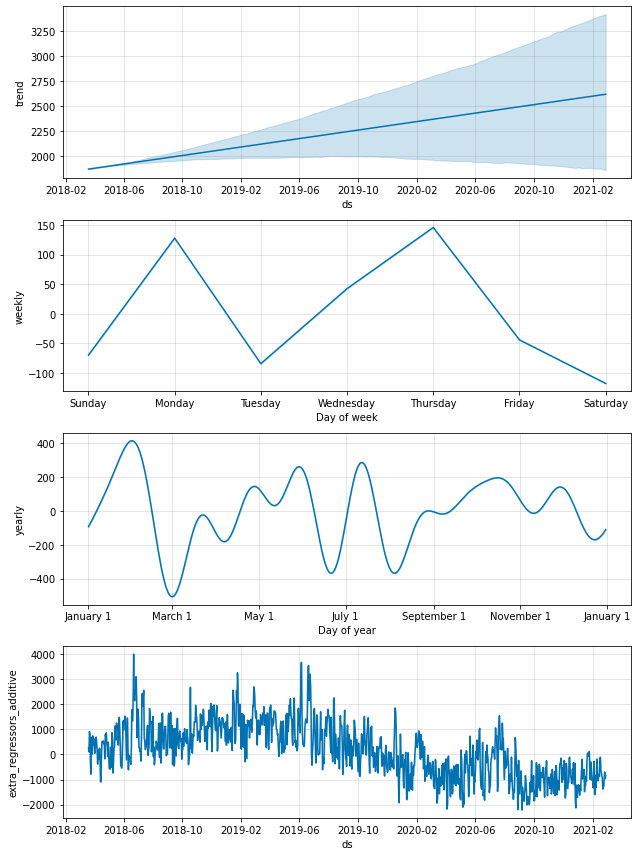

In [ ]:
model.plot_components(forecast_values_new)

# Answer: Thursday

---

#Q20.

**Train a multivariate time series model performing the same train test split as before, but now exclude T-max from the training data(drop T-max),**

**What is the mean absolute percentage error (MAPE) to 2 decimal places on the test set?**

In [ ]:
daily_df.head(3)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.38,88.56,2751.700
1,2010-09-02,369.6,38898.99,88.56,570.810
2,2010-09-03,439.2,41665.76,106.80,504.975


In [ ]:
train_data_2 = daily_df.iloc[:2757,:]
test_data_2 = daily_df.iloc[2757:,:] 

In [ ]:
train_data_2.shape , test_data_2.shape

((2757, 5), (1077, 5))

In [ ]:
df_train_2 = train_data_2.iloc[:,[0,2,3,4]]
df_test_2 = test_data_2.iloc[:,[0,2,3,4]]

In [ ]:
df_train_2 = df_train_2.rename(columns = {'FullDate':'ds',
                                           'SysLoad':'add1','GasPrice':'add2',
                                           'ElecPrice':'y'})
df_test_2 = df_test_2.rename(columns = {'FullDate':'ds',
                                           'SysLoad':'add1','GasPrice':'add2',
                                           'ElecPrice':'y'})

In [ ]:
df_train_2.head(3)

,ds,add1,add2,y
0,2010-09-01,41565.38,88.56,2751.700
1,2010-09-02,38898.99,88.56,570.810
2,2010-09-03,41665.76,106.80,504.975


In [ ]:
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')

In [ ]:
model = model.fit(df_train_2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast_values_new = model.predict(df_test_2)

## Answer:

In [ ]:
MAPE = Metric(df_test_2['y'],forecast_values_new['yhat'])
print(f'The Mean Average Percentage Error ( MAPE) is:{round(MAPE,2)}')

The Mean Average Percentage Error ( MAPE) is:236.66


---
---